In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import File**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Deep learning/DF3.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**This healthcare dataset contains patient information, including whether they have experienced a stroke.**

# **Data Preprossing**

## Remove `Null` Values

In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Although only the **'bmi'** column contains missing values, the significant number of these values could potentially impact the results of the analysis.

In [ ]:
data.shape

(5110, 12)

We used `SimpleImputer` to handle missing values in the 'bmi' column.

> The strategy 'mean' was employed to replace missing values with the average value of the column.



In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
data['bmi']=si.fit_transform(data[['bmi']])

In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


## Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
obj_columns=data.select_dtypes(include=['object']).columns
obj_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

We applied Label Encoding to transform categorical features into numerical representations.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_columns:
  data[col]=le.fit_transform(data[col])

data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [ ]:
for i in obj_columns:
  print(i,data[i].unique())

gender [1 0 2]
ever_married [1 0]
work_type [2 3 0 4 1]
Residence_type [1 0]
smoking_status [1 2 3 0]


## Drop UnImportent Features and Checks Relation Between Features

In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
data.corrwith(data['stroke'])

,0
gender,0.008929
age,0.245257
hypertension,0.127904
heart_disease,0.134914
ever_married,0.108340
work_type,-0.032316
Residence_type,0.015458
avg_glucose_level,0.131945
bmi,0.038947
smoking_status,0.028123


In [ ]:
flt_data=data.select_dtypes(include=['float64']).columns
flt_data

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

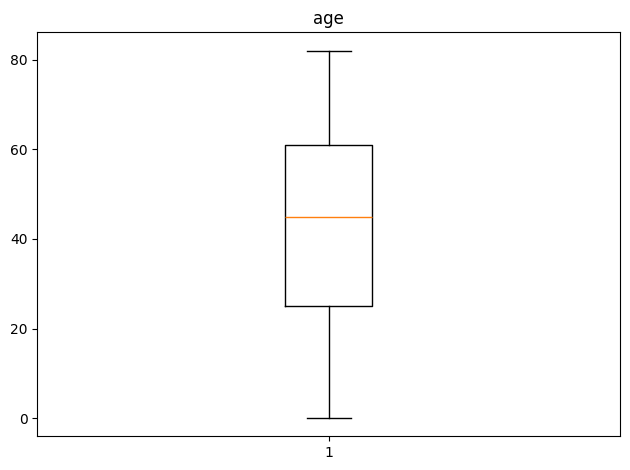

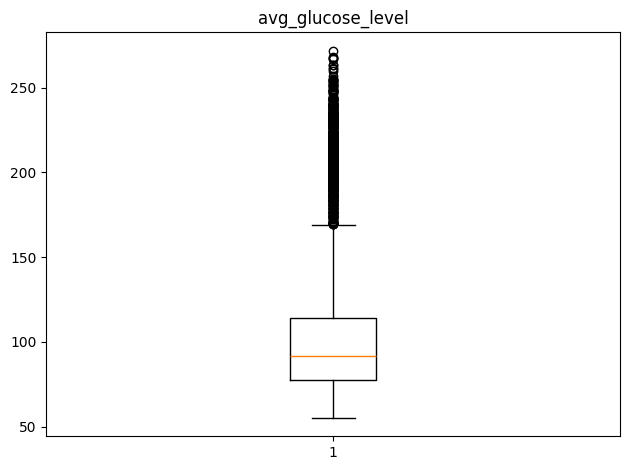

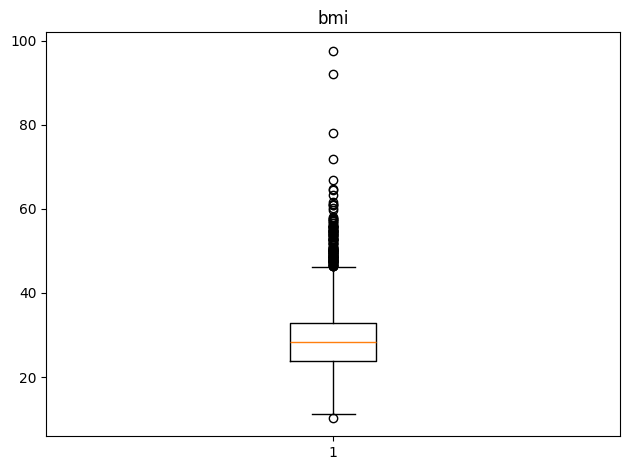

In [ ]:
for i in flt_data:
  plt.boxplot(data[i])
  plt.title(i)
  plt.tight_layout()
  plt.show()

The columns 'avg_glucose_level' and 'bmi' contain a significant number of outliers, which can negatively impact the performance of machine learning models. To mitigate this, we will employ the Interquartile Range (IQR) method to identify and handle these outliers.

In [ ]:
def remove_outlier(x,low,high):
  if x > high:
    return high
  elif x < low:
    return low
  else:
    return x

In [ ]:
def IQR(col):
  for i in col:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    data[i]=data[i].apply(remove_outlier,args=(lower_bound,upper_bound))


In [ ]:
IQR(['avg_glucose_level','bmi'])

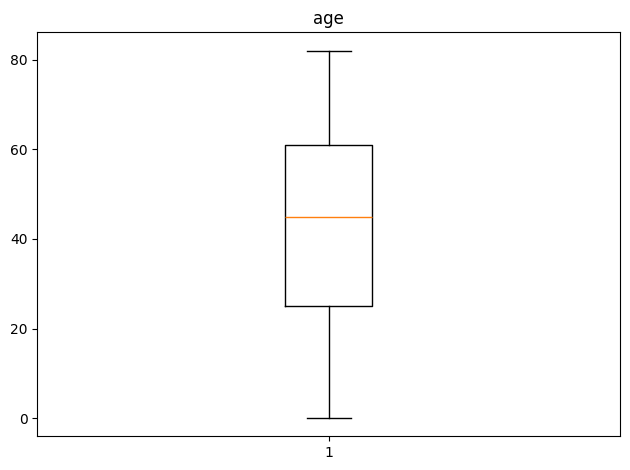

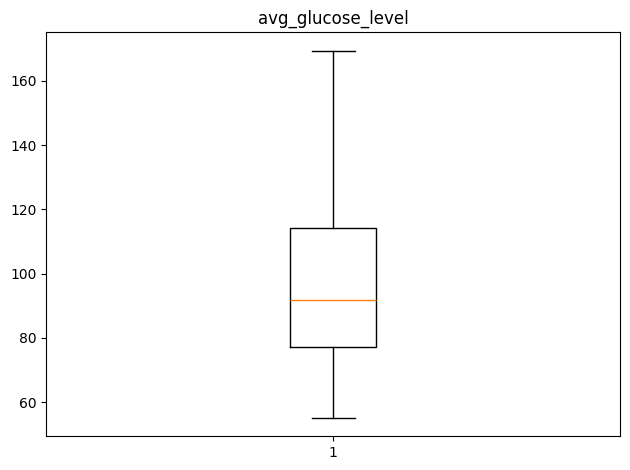

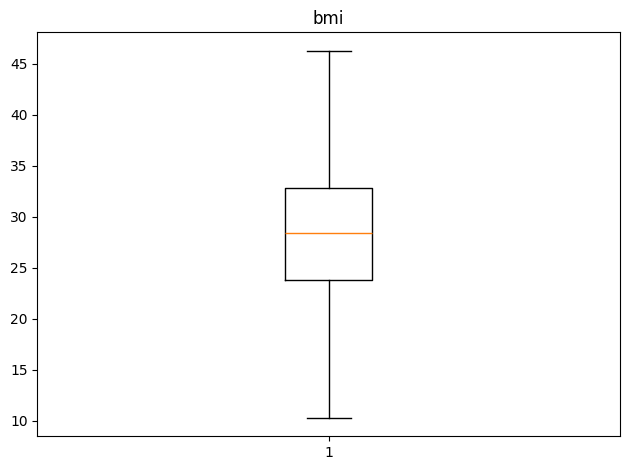

In [ ]:
for i in flt_data:
  plt.boxplot(data[i])
  plt.title(i)
  plt.tight_layout()
  plt.show()

## Handeling Imblansed Dataset

In [ ]:
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


The dataset is highly imbalanced, which could lead to the model overfitting to the majority class (0) and poorly predicting the minority class.

We used `SMOTE` to address the class imbalance in the dataset.

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x=data.drop('stroke',axis=1)
y=data['stroke']
x_smote,y_smote=smote.fit_resample(x,y)

In [ ]:
y_smote.value_counts()

,count
stroke,
1,4861
0,4861


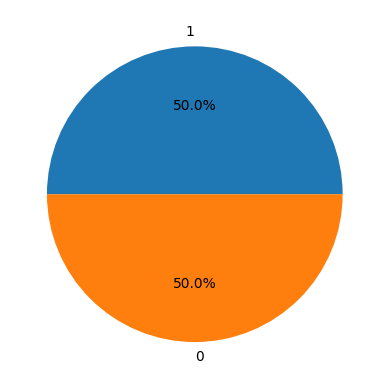

In [ ]:
plt.pie(y_smote.value_counts(),labels=y_smote.value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
x_smote.corrwith(y_smote)

,0
gender,-0.197768
age,0.591868
hypertension,-0.014018
heart_disease,0.021785
ever_married,0.175372
work_type,-0.208414
Residence_type,-0.175710
avg_glucose_level,0.239840
bmi,0.111895
smoking_status,-0.095473


In [ ]:
corelation=x_smote.corrwith(y_smote).abs()
corelation

,0
gender,0.197768
age,0.591868
hypertension,0.014018
heart_disease,0.021785
ever_married,0.175372
work_type,0.208414
Residence_type,0.175710
avg_glucose_level,0.239840
bmi,0.111895
smoking_status,0.095473


In [ ]:
thresold=0.1
relevant_features=corelation[corelation>thresold]
relevant_features

,0
gender,0.197768
age,0.591868
ever_married,0.175372
work_type,0.208414
Residence_type,0.175710
avg_glucose_level,0.239840
bmi,0.111895


In [ ]:
removed_features=corelation[corelation<thresold]
removed_features

,0
hypertension,0.014018
heart_disease,0.021785
smoking_status,0.095473


In [ ]:
x=x_smote[relevant_features.index]
y=y_smote
x.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,1,67.0,1,2,1,169.3575,36.600000
1,0,61.0,1,3,0,169.3575,28.893237
2,1,80.0,1,2,0,105.9200,32.500000
3,0,49.0,1,2,1,169.3575,34.400000
4,0,79.0,1,3,0,169.3575,24.000000


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_flt=sc.fit_transform(x.select_dtypes(include=['float64']))
x_flt=pd.DataFrame(x_flt,columns=x.select_dtypes(include=['float64']).columns)
x_flt.head()

,age,avg_glucose_level,bmi
0,0.540031,1.552065,1.156171
1,0.268684,1.552065,-0.072769
2,1.127949,-0.089897,0.502375
3,-0.274010,1.552065,0.805353
4,1.082724,1.552065,-0.853057


In [ ]:
x[flt_data]=x_flt
x.columns

/tmp/ipython-input-2754519541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[flt_data]=x_flt


Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi'],
      dtype='object')

In [ ]:
x.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,1,0.540031,1,2,1,1.552065,1.156171
1,0,0.268684,1,3,0,1.552065,-0.072769
2,1,1.127949,1,2,0,-0.089897,0.502375
3,0,-0.274010,1,2,1,1.552065,0.805353
4,0,1.082724,1,3,0,1.552065,-0.853057


## Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Models

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_prime=DecisionTreeClassifier()
dt_prime.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_prime.score(x_test,y_test)

0.8966580976863753

In [ ]:
dt_prime.tree_.max_depth

23

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df={'max_depth':[i for i in range(1,dt_prime.tree_.max_depth+1)],
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'class_weight':[None,'balanced']}

In [ ]:
gd=GridSearchCV(DecisionTreeClassifier(),param_grid=df,cv=5)
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23],
                         'splitter': ['best', 'random']})

In [ ]:
best_parm=gd.best_params_
best_parm

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 22,
 'splitter': 'random'}

In [ ]:
weight=best_parm['class_weight']
cri=best_parm['criterion']
split=best_parm['splitter']
depth=best_parm['max_depth']
weight,cri,split,depth

('balanced', 'entropy', 'random', 22)

In [ ]:
dt=DecisionTreeClassifier(class_weight=weight,criterion=cri,max_depth=depth,splitter=split)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=22, splitter='random')

In [ ]:
dt.score(x_test,y_test)

0.9053984575835475

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       975
           1       0.89      0.92      0.91       970

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



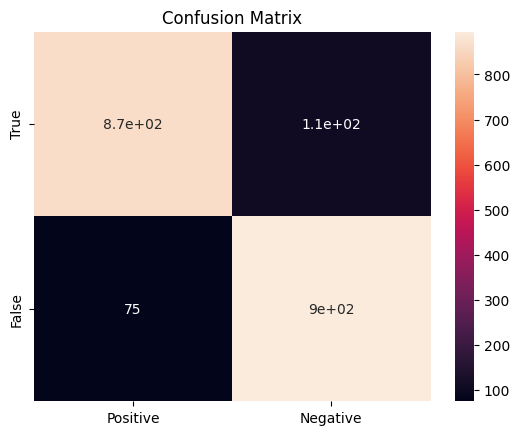

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))


sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.89      0.92      0.90      0.91      0.82       975
          1       0.89      0.92      0.89      0.91      0.91      0.82       970

avg / total       0.91      0.91      0.91      0.91      0.91      0.82      1945



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(dt,x,y,cv=kfold)
print(result.mean())

0.9034145799612808


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,val_scores=learning_curve(dt,x_train,y_train,cv=5,scoring='accuracy')
val_scores=np.mean(val_scores,axis=1)
train_scores=np.mean(train_scores,axis=1)
val_scores,train_scores

(array([0.79323726, 0.84492631, 0.86743079, 0.88272791, 0.89108787]),
 array([1.        , 0.99841663, 0.99771996, 0.99601742, 0.99508118]))

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=550,class_weight=weight,criterion=cri,max_depth=depth)
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=22, n_estimators=550)

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(rf,x,y,cv=kfold)
print(result.mean())

0.9369474859034984


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       975
           1       0.92      0.95      0.93       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



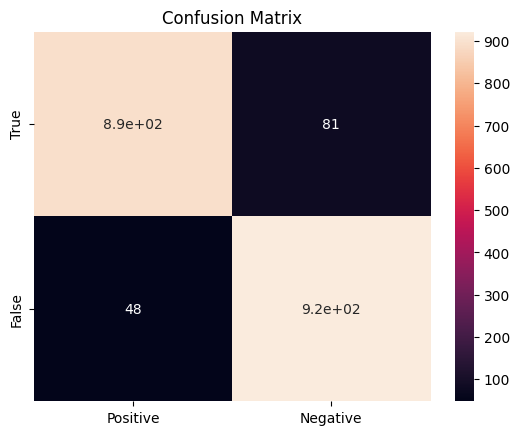

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))


sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')

plt.show()

## K-NEAREST NEIGHBOR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df2={'n_neighbors':[i for i in range(1,100)],
     'p':[1,2],
     'weights':['uniform','distance']}

In [ ]:
from sklearn.model_selection import GridSearchCV
gd2=GridSearchCV(KNeighborsClassifier(),df2,cv=10)
gd2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
best_parm=gd2.best_params_
best_parm

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [ ]:
neighbors=best_parm['n_neighbors']
p=best_parm['p']
weight=best_parm['weights']
neighbors,p,weight

(1, 1, 'uniform')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=neighbors,p=p,weights=weight)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(knn,x,y,cv=kfold)
print(result.mean())

0.9197692722714145


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       975
           1       0.89      0.97      0.93       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



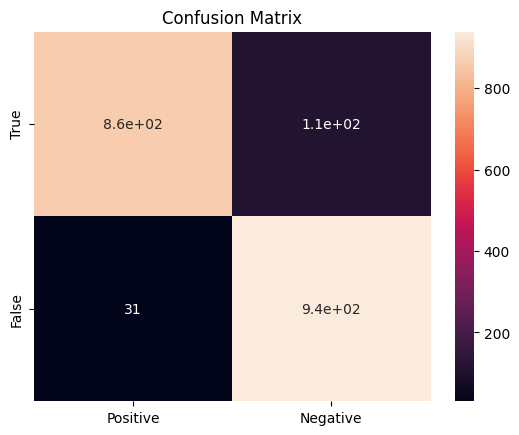

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

## NAIVE BAYES

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(gnb,x,y,cv=kfold)
print(result.mean())

0.7784404455869752


In [ ]:
gnb.score(x_test,y_test)

0.781491002570694

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       975
           1       0.74      0.88      0.80       970

    accuracy                           0.78      1945
   macro avg       0.79      0.78      0.78      1945
weighted avg       0.79      0.78      0.78      1945



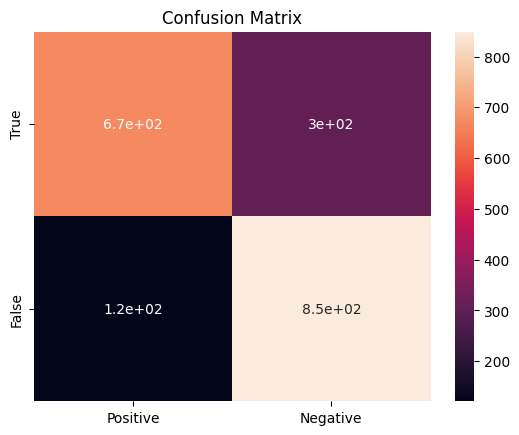

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=gnb.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(bnb,x,y,cv=kfold)
print(result.mean())

0.7576624139134849


              precision    recall  f1-score   support

           0       0.78      0.71      0.74       975
           1       0.73      0.80      0.76       970

    accuracy                           0.75      1945
   macro avg       0.76      0.75      0.75      1945
weighted avg       0.76      0.75      0.75      1945



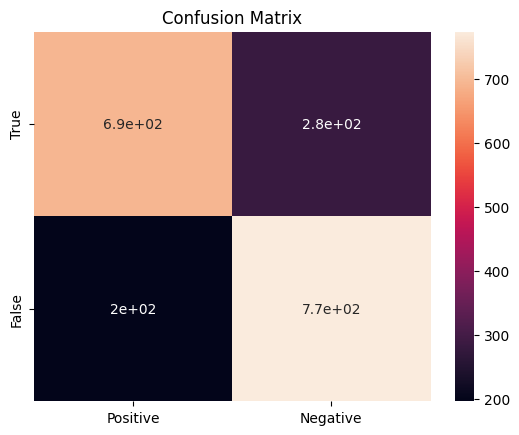

In [ ]:
y_pred=bnb.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
gd3=GridSearchCV(SVC(),{'kernel':['linear','poly','rbf','sigmoid'],
                        'class_weight':['balanced',None],
                        'decision_function_shape':['ovr', 'ovo'],
                        'gamma':['scale','auto']},cv=5)
gd3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
params=gd3.best_params_
params

{'class_weight': 'balanced',
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

In [ ]:
weight=params['class_weight']
kernel=params['kernel']
shape=params['decision_function_shape']
gamma=params['gamma']
weight,kernel,shape,gamma

('balanced', 'rbf', 'ovr', 'auto')

In [ ]:
svc=SVC(class_weight=weight,kernel=kernel,decision_function_shape=shape,gamma=gamma)
svc.fit(x_train,y_train)

SVC(class_weight='balanced', gamma='auto')

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(svc,x,y,cv=kfold)
print(result.mean())

0.8331619537275066


              precision    recall  f1-score   support

           0       0.87      0.77      0.82       975
           1       0.79      0.88      0.84       970

    accuracy                           0.83      1945
   macro avg       0.83      0.83      0.83      1945
weighted avg       0.83      0.83      0.83      1945



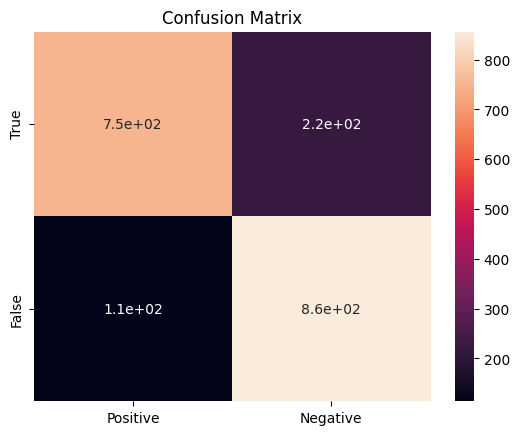

In [ ]:
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()
#

### Logical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
gd4=GridSearchCV(LogisticRegression(),{'penalty':['l1','l2','elasticnet',None],
                                       'solver':['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                                       'class_weight':[None,'balanced'],
                                       'l1_ratio':[0.5, None]},cv=5,return_train_score=True,refit=True)
gd4.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'l1_ratio': [0.5, None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True)

In [ ]:
gd4.best_score_

np.float64(0.7946514684366708)

In [ ]:
params=gd4.best_params_
params

{'class_weight': 'balanced',
 'l1_ratio': 0.5,
 'penalty': 'l1',
 'solver': 'saga'}

In [ ]:
weight=params['class_weight']
penalty=params['penalty']
solver=params['solver']
weight,penalty,solver

('balanced', 'l1', 'saga')

In [ ]:
lr=LogisticRegression(class_weight=weight,penalty=penalty,solver=solver)
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
lr.score(x_test,y_test)

0.7902313624678663

In [ ]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(lr,x,y,cv=kfold)
print(result.mean())

0.7944855967078189


              precision    recall  f1-score   support

           0       0.81      0.75      0.78       975
           1       0.77      0.83      0.80       970

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945



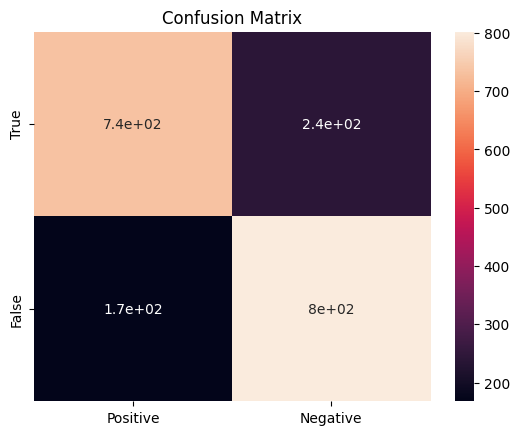

In [ ]:
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

# Scorring

In [ ]:
from sklearn.metrics import roc_auc_score,recall_score,precision_score,accuracy_score,f1_score

In [ ]:
def get_score(model):
  scores=[]
  for i in model:
    scores.append(accuracy_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_recall(model):
  scores=[]
  for i in model:
    scores.append(recall_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_precision(model):
  scores=[]
  for i in model:
    scores.append(precision_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_f1_score(model):
  scores=[]
  for i in model:
    scores.append(f1_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_roc(model):
  scores=[]
  for i in model:
    scores.append(roc_auc_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
l=[dt,rf,knn,gnb,bnb,svc,lr]

In [ ]:
df={"model":["Decission Tree","Random Forest","K-Nearest Neighbours","Gaussion Naive Bayes","Bernoulli Naive Bayes","Support Vector Matchines","Logistic Regression"],
    "Accuracy":get_score(l),
    "f1_score":get_f1_score(l),
    "recall":get_recall(l),
    "precision":get_precision(l),
    "roc":get_roc(l)}

In [ ]:
df1=pd.DataFrame(df)
df1.sort_values(by='Accuracy',ascending=False)

,model,Accuracy,f1_score,recall,precision,roc
1,Random Forest,0.933676,0.934617,0.950515,0.919242,0.933719
2,K-Nearest Neighbours,0.925964,0.928783,0.968041,0.892586,0.926072
0,Decission Tree,0.905398,0.906788,0.922680,0.891434,0.905443
5,Support Vector Matchines,0.826221,0.835122,0.882474,0.792593,0.826365
6,Logistic Regression,0.790231,0.797217,0.826804,0.769674,0.790325
3,Gaussion Naive Bayes,0.781491,0.799812,0.875258,0.736340,0.781731
4,Bernoulli Naive Bayes,0.754242,0.764067,0.797938,0.732955,0.754354


# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
df={
    'class_weight':['balanced',None],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'max_depth':[i for i in range(1,10,2)],
    'max_leaves':[i for i in range(1,100,10)],
}

In [ ]:
gd=GridSearchCV(LGBMClassifier(),df,cv=5, scoring='accuracy',verbose=1)
gd.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_leaves': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]},
             scoring='accuracy', verbose=1)

In [ ]:
params=gd.best_params_
params

{'class_weight': 'balanced',
 'learning_rate': 0.2,
 'max_depth': 9,
 'max_leaves': 1}

In [ ]:
class_weight=params['class_weight']
learning_rate=params['learning_rate']
max_depth=params['max_depth']
max_leaves=params['max_leaves']
class_weight,learning_rate,max_depth,max_leaves

('balanced', 0.2, 9, 1)

In [ ]:
lbc=LGBMClassifier(n_estimators=150,class_weight=class_weight,learning_rate=learning_rate,max_depth=max_depth,max_leaves=max_leaves,random_state=42)
lbc.fit(x_train,y_train)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 3891, number of negative: 3886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.2, max_depth=9,
               max_leaves=1, n_estimators=150, random_state=42)

In [ ]:
lbc.score(x_test,y_test)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31


0.9593830334190231

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       975
           1       0.96      0.96      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



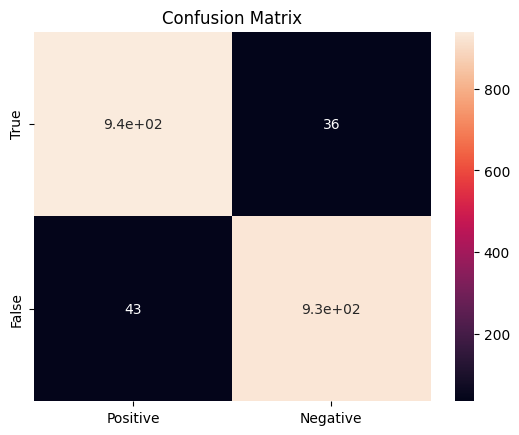

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=lbc.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

# Ensemble Two Models Using LightGBM

In [ ]:
model1=pd.DataFrame(x_train)
model1['stroke']=rf.predict(x_train)
model1.head()


,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
5377,0,-0.589959,0,2,0,-1.284854,1.525385,1
6692,0,0.922933,1,2,0,1.552065,-0.408686,1
4996,0,-0.681030,1,2,1,-0.399200,-0.916842,0
1561,1,0.313908,1,2,1,0.376776,0.869139,0
2114,0,-1.178500,1,2,1,-0.729728,-1.012519,0


In [ ]:
model2=pd.DataFrame(x_train)
model2['stroke']=knn.predict(x_train)
model2.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
5377,0,-0.589959,0,2,0,-1.284854,1.525385,1
6692,0,0.922933,1,2,0,1.552065,-0.408686,1
4996,0,-0.681030,1,2,1,-0.399200,-0.916842,0
1561,1,0.313908,1,2,1,0.376776,0.869139,0
2114,0,-1.178500,1,2,1,-0.729728,-1.012519,0


In [ ]:
data=pd.concat([model1,model2])
data.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
5377,0,-0.589959,0,2,0,-1.284854,1.525385,1
6692,0,0.922933,1,2,0,1.552065,-0.408686,1
4996,0,-0.681030,1,2,1,-0.399200,-0.916842,0
1561,1,0.313908,1,2,1,0.376776,0.869139,0
2114,0,-1.178500,1,2,1,-0.729728,-1.012519,0


In [ ]:
lgbm_x=data.drop('stroke',axis=1)
lgbm_y=data['stroke']

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
df={
    'class_weight':['balanced',None],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'max_depth':[i for i in range(1,10,2)],
    'max_leaves':[i for i in range(1,100,10)],
}

In [ ]:
gd=GridSearchCV(LGBMClassifier(),df,cv=5, scoring='accuracy',verbose=1)
gd.fit(lgbm_x,lgbm_y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_leaves': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]},
             scoring='accuracy', verbose=1)

In [ ]:
params=gd.best_params_
params

{'class_weight': 'balanced',
 'learning_rate': 0.2,
 'max_depth': 9,
 'max_leaves': 1}

In [ ]:
weight=params['class_weight']
learning_rate=params['learning_rate']
max_depth=params['max_depth']
max_leaves=params['max_leaves']
weight,learning_rate,max_depth,max_leaves

('balanced', 0.2, 9, 1)

In [ ]:
lgbm=LGBMClassifier(n_estimators=150,class_weight=weight,learning_rate=learning_rate,max_depth=max_depth,max_leaves=max_leaves,random_state=42)
lgbm.fit(lgbm_x,lgbm_y)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 7787, number of negative: 7767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 15554, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.2, max_depth=9,
               max_leaves=1, n_estimators=150, random_state=42)

In [ ]:
lgbm.score(x_test,y_test)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31


0.9686375321336761

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       975
           1       0.97      0.97      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



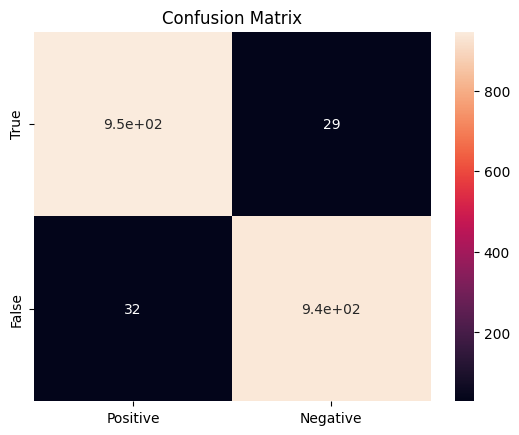

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=lgbm.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, xticklabels=["Positive", "Negative"], yticklabels=["True", "False"])
plt.title('Confusion Matrix')
plt.show()

# Ensemble Two Models Using LightGBM As ChatGPT

In [ ]:
pred1=rf.predict_proba(x_train)[:,1]
pred2=knn.predict_proba(x_train)[:,1]
pred1,pred2

(array([0.96262569, 0.99969762, 0.00181818, ..., 1.        , 0.10606009,
        0.76580764]),
 array([1., 1., 0., ..., 1., 0., 1.]))

In [ ]:
x_meta=np.column_stack((pred1,pred2))
x_meta

array([[0.96262569, 1.        ],
       [0.99969762, 1.        ],
       [0.00181818, 0.        ],
       ...,
       [1.        , 1.        ],
       [0.10606009, 0.        ],
       [0.76580764, 1.        ]])

In [113]:
gd=GridSearchCV(LGBMClassifier(),df,cv=5, scoring='accuracy',verbose=1)
gd.fit(x_meta,y_train)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
params=gd.best_params_
params

In [115]:
weight=params['class_weight']
learning_rate=params['learning_rate']
max_depth=params['max_depth']
max_leaves=params['max_leaves']
weight,learning_rate,max_depth,max_leaves

('balanced', 0.01, 1, 1)

In [116]:
lgbm_p=LGBMClassifier(n_estimators=150,class_weight=weight,learning_rate=learning_rate,max_depth=max_depth,max_leaves=max_leaves,random_state=42)
lgbm_p.fit(x_meta,y_train)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 3891, number of negative: 3886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

LGBMClassifier(class_weight='balanced', learning_rate=0.01, max_depth=1,
               max_leaves=1, n_estimators=150, random_state=42)

In [117]:
pred1_test = rf.predict_proba(x_test)[:,1]
pred2_test = knn.predict_proba(x_test)[:,1]
x_meta_test = np.column_stack((pred1_test, pred2_test))
lgbm_p.score(x_meta_test,y_test)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9259640102827763

# Comparing


In [118]:
l=[lbc,lgbm]

In [120]:
df={"model":["LightGBM Classifier","LightGBM Ensemble","LightGBM Probability"],
    "Accuracy":get_score(l)+[accuracy_score(y_test, lgbm_p.predict(x_meta_test))],
    "f1_score":get_f1_score(l)+[f1_score(y_test, lgbm_p.predict(x_meta_test))],
    "recall":get_recall(l)+[recall_score(y_test, lgbm_p.predict(x_meta_test))],
    "precision":get_precision(l)+[precision_score(y_test, lgbm_p.predict(x_meta_test))],
    "roc":get_roc(l)+[roc_auc_score(y_test, lgbm_p.predict(x_meta_test))]}

[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current v

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=1 will be ignored. Current value: num_leaves=31


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [121]:
df1=pd.DataFrame(df)
df1

,model,Accuracy,f1_score,recall,precision,roc
0,LightGBM Classifier,0.959383,0.959131,0.955670,0.962617,0.959374
1,LightGBM Ensemble,0.968638,0.968508,0.967010,0.970010,0.968633
2,LightGBM Probability,0.925964,0.928783,0.968041,0.892586,0.926072
